### Joblib and Lambda

In [110]:
# Imprting the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from datacleaner import autoclean
from joblib import dump, load, parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [111]:
# General settings
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'


In [112]:
# Importing the dataset
dataset = pd.read_csv("C:/Users/Maftuna/Downloads/insurance.csv")

In [113]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
# Checking the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
# Checking statistics of the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Datapreprocessing

In [116]:
# Checking cardinality of the dataset
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [117]:
dataset.region.unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [118]:
# Autocleaning the dataset
dataset = autoclean(dataset)
dataset.head(5)

c:\Users\Maftuna\anaconda3\Lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  input_dataframe[column].fillna(input_dataframe[column].median(), inplace=True)
c:\Users\Maftuna\anaconda3\Lib\site-packages\datacleaner\datacleaner.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Scaling 

In [119]:
# Scaling the dataset
scaler = StandardScaler()
dataset[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(dataset[['age', 'bmi', 'children', 'charges']])

In [120]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,0.298584
1,-1.509965,1,0.509621,-0.078767,0,2,-0.953689
2,-0.797954,1,0.383307,1.580926,0,2,-0.728675
3,-0.441948,1,-1.305531,-0.908614,0,1,0.719843
4,-0.513149,1,-0.292556,-0.908614,0,1,-0.776802


### Visualization

<Axes: >

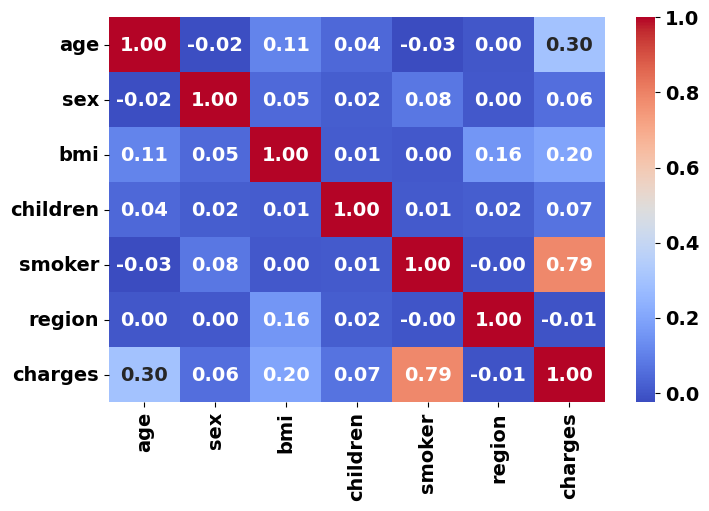

In [121]:
# Correlation matrix
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

Strong correlation with smoker 

C:\Users\Maftuna\AppData\Local\Temp\ipykernel_13284\2001158707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges', data=dataset, palette='muted', ax=ax1)
C:\Users\Maftuna\AppData\Local\Temp\ipykernel_13284\2001158707.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=dataset, palette='magma', ax=ax2)


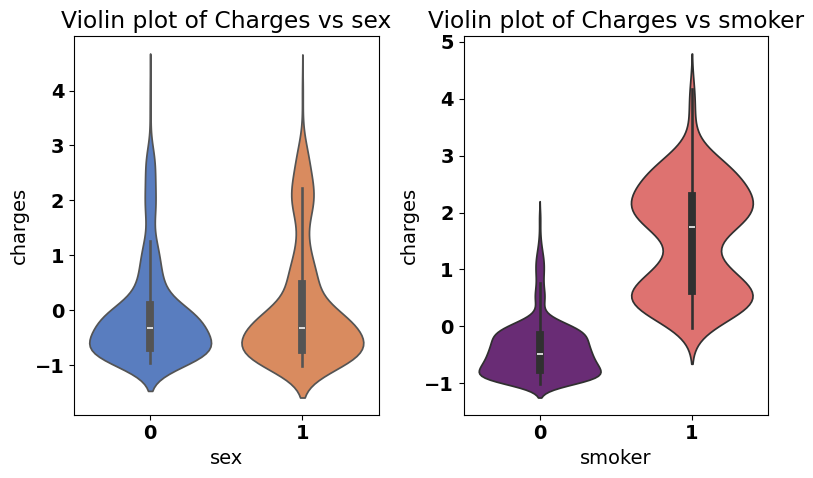

In [122]:

ax1 = plt.subplot(121)  # first subplot (first column)
sns.violinplot(x='sex', y='charges', data=dataset, palette='muted', ax=ax1)
ax1.set_title('Violin plot of Charges vs sex')


ax2 = plt.subplot(122)  # second subplot (second column)
sns.violinplot(x='smoker', y='charges', data=dataset, palette='magma', ax=ax2)
ax2.set_title('Violin plot of Charges vs smoker')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Training

In [123]:
# Splitting the dataset into features and target variable
X = dataset.drop(columns=['charges'])
y = dataset['charges']

In [124]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, X_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### Model building

In [125]:
def get_models():
    """Returns a dictionary of models to train."""
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }
    return models


In [126]:
models = get_models()
# Training the models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modellar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

best_model_name = None
best_model = None
best_score = -1

for name, model in models.items():
    model.fit(X_train, y_train)  # Modelni o‘rgatish
    r2 = model.score(X_test, y_test)  # Baholash
    print(f"{name} R²: {r2:.4f}")
    
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

# Eng yaxshi modelni saqlash
joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_model.joblib")
print(f"✅ Saved best model: {best_model_name}")


In [127]:
# Saving the models
dump(trained_models, 'trained_insurance.joblib')

['trained_insurance.joblib']

In [128]:
# Loading the models
loaded_models = load('trained_insurance.joblib')

In [129]:
results = {}
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [130]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])
# Displaying the results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MSE', 'R²']
print(results_df)

               Model       MSE        R²
0      Random Forest  0.144493  0.873468
1  Linear Regression  0.246839  0.783844
2      Decision Tree  0.333916  0.707591


In [131]:
# Displaying the results
from tabulate import tabulate

results = [
    ['Random Forest', 0.144493, 0.873468],
    ['Linear Regression', 0.246839, 0.783844],
    ['Decision Tree', 0.333916, 0.707591]
]

# Displaying the results in a table format
headers = ['Model', 'MSE', 'R²']

# Displaying the results in a table format
print(tabulate(results, headers=headers, tablefmt='github'))


| Model             |      MSE |       R² |
|-------------------|----------|----------|
| Random Forest     | 0.144493 | 0.873468 |
| Linear Regression | 0.246839 | 0.783844 |
| Decision Tree     | 0.333916 | 0.707591 |


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_13284\2223302571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')


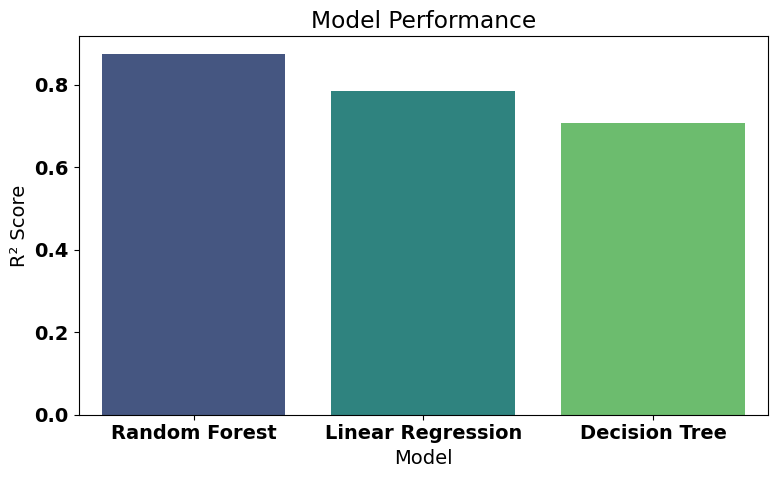

In [132]:


# Visualizing the results
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()


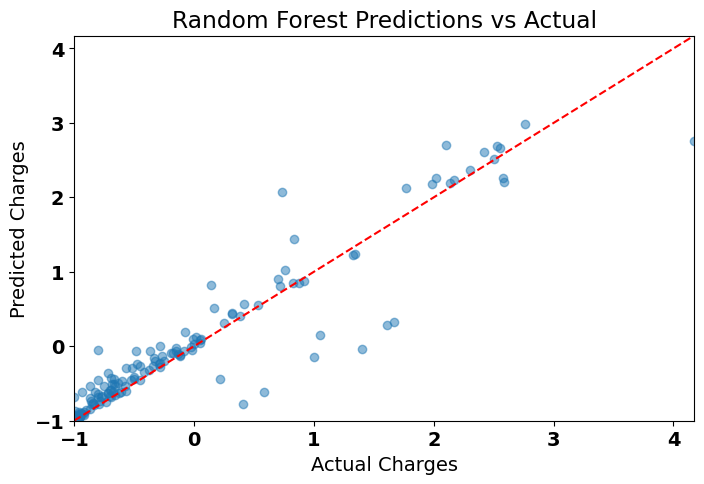

In [133]:
# Visualizing the predictions of the best model
best_model_name = results_df.iloc[0]['Model']
best_model = loaded_models[best_model_name]
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'{best_model_name} Predictions vs Actual')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

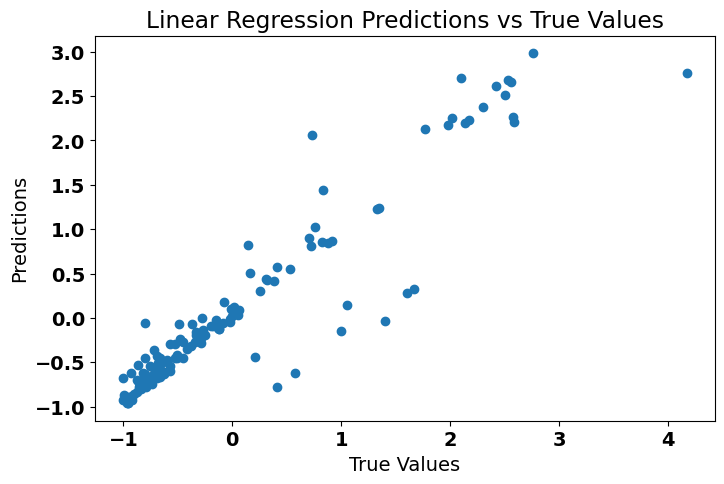

In [134]:
# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.show()

In [135]:
# Saving the best model
best_model_name = results_df.loc[0, 'Model']  

# Loading the best model
best_model = loaded_models[best_model_name]

# Save the best model using joblib
from joblib import dump
dump(best_model, f"{best_model_name.replace(' ', '_')}_best_model.joblib")

print(f"✅ Saved best model as: {best_model_name.replace(' ', '_')}_best_model.joblib")


✅ Saved best model as: Random_Forest_best_model.joblib
